### Nombre: Pamela Pachacama
# Proyecto de 2 Bimestre
## Libros ofertados en ESPAEBOOK
### Descripción: Es un Dataset en formato .csv, que mediante el uso de scrapy se obtuvo el  titulo, autor, categoría, publicacion, descargas, paginas

### Objetivo
* Analizar y graficar la información del dataset LIBROS.csv
### Desarrollo


* Importar librerias necesarias para la ejecución del código

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

* Se definen las columnas a utilizar, la ruta del archivo y se lee el archivo de la ruta. 

In [2]:
path_dataset = "C://Users//Pamela//Documents//GitHub//py-pachacama-simba-a-pamela-abigail//03-scrapy//07-arania-proy//proyecto_arania//libros.csv"
columnas = ["titulo", 
            "autor", 
            "categoria",
            "publicacion",
            "descargas",
            "paginas"]

dataframe = pd.read_csv(path_dataset,encoding='latin-1', header= None)
dataframe.columns = columnas
print(dataframe.shape)

(29696, 6)


* El tamaño del dataset es:(29696, 6)

### Procesamiento y analisis de datos.

* Número de libros por categorias

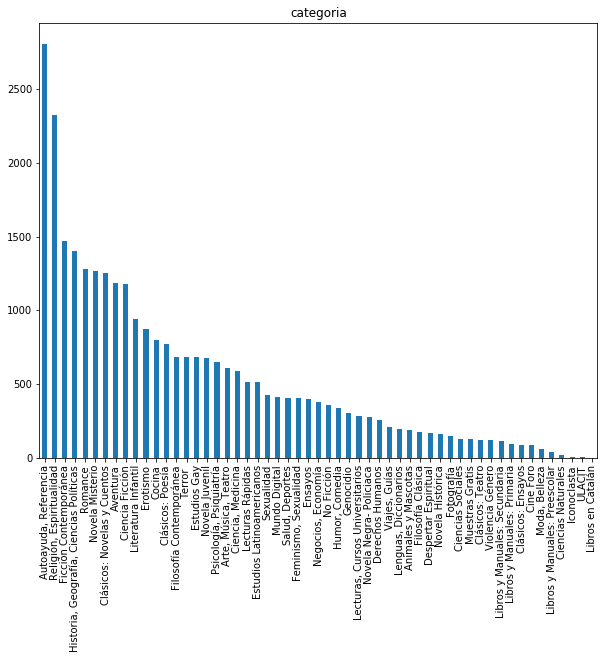

In [3]:
plt.figure(figsize=(10,8))
plt.title('categoria')
dataframe["categoria"].value_counts().plot(kind='bar')
plt.show()

**Resultado:** La categoria con mayor numero de libros es Autoayuda, Referencia y el menor numero de libros son en catalan 

In [4]:
print(dataframe["categoria"].value_counts().head(5))

Autoayuda, Referencia                      2806
Religión, Espiritualidad                   2324
Ficción Contemporánea                      1468
Historia, Geografía, Ciencias Políticas    1400
Romance                                    1282
Name: categoria, dtype: int64


**Resultado:**  Autoayuda, Referencia tiene la cantidad de 2806, seguido por Religion con 2324, Ficcion con 1468, Historico con 1400 y finalmente romance con 1282 

## Descargas promedio por categoria

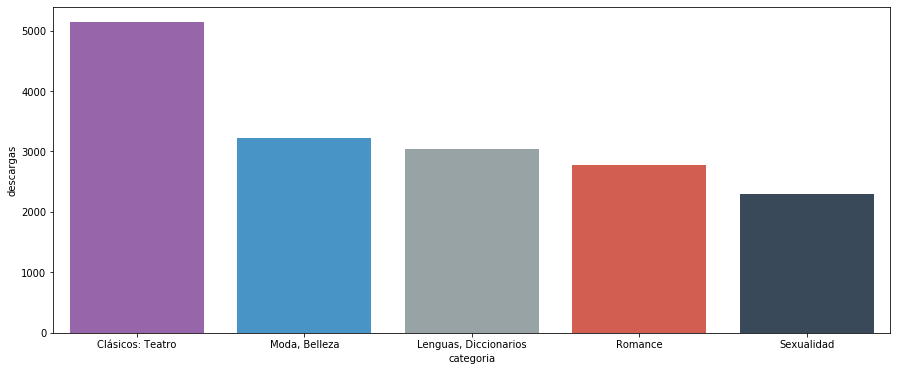

In [5]:
paleta = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
descargas_categoria = dataframe.groupby("categoria")["descargas"].mean().sort_values(ascending=False).head(5)
figura_mes = plt.subplots(1,1,figsize=(15,6))
ax = sns.barplot(descargas_categoria.index, descargas_categoria,palette=paleta)

**Resultado:**  La mayor cantidad de descargas de va a los Clasicos de teatros, seguidos por moda y belleza. 

In [6]:
descargas_categoria = dataframe.groupby("categoria")["descargas"].mean().sort_values(ascending=False)
print(descargas_categoria)

categoria
Clásicos: Teatro                           5139.098361
Moda, Belleza                              3221.903226
Lenguas, Diccionarios                      3043.862245
Romance                                    2777.113105
Sexualidad                                 2297.365566
Erotismo                                   2030.409404
Cocina                                     1994.125313
Negocios, Economía                         1975.840314
Autoayuda, Referencia                      1953.773343
Fotografía                                 1939.810811
Estudios Gay                               1785.184211
Feminismo, Sexualidad                      1719.331683
Humor, Comedia                             1692.005917
Psicología, Psiquiatría                    1666.175926
Salud, Deportes                            1643.576355
Animales y Mascotas                        1627.831579
Ciencia, Medicina                          1622.644068
Lecturas, Cursos Universitarios            1606.283688


**Resultado:**  Al igual que los libros, las descargas son minimas de libros en Catalan con 12000 descargas. 

### Descargas promedio por categoria

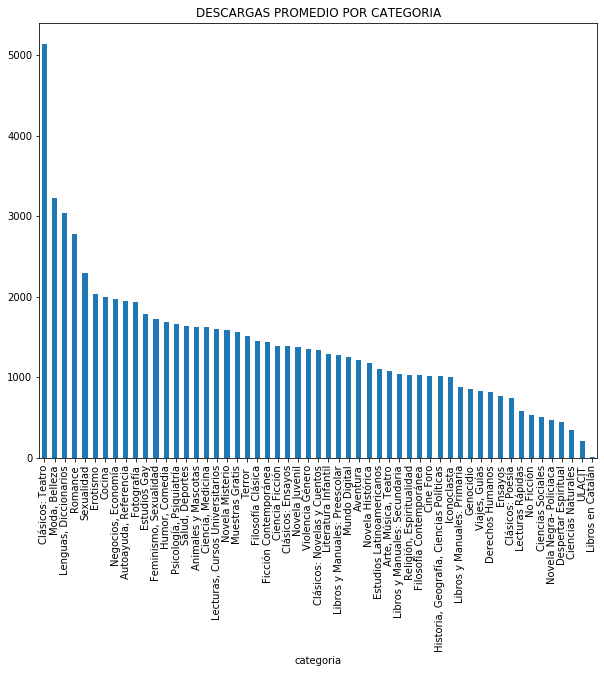

In [7]:
plt.figure(figsize=(10,8))
plt.title('DESCARGAS PROMEDIO POR CATEGORIA')
dataframe.groupby("categoria")["descargas"].mean().sort_values(ascending=False).plot(kind='bar')
plt.show()

In [8]:
descargas_categoria = dataframe.groupby("categoria")["descargas"].mean().sort_values(ascending=False).head(5)
print(descargas_categoria)

categoria
Clásicos: Teatro         5139.098361
Moda, Belleza            3221.903226
Lenguas, Diccionarios    3043.862245
Romance                  2777.113105
Sexualidad               2297.365566
Name: descargas, dtype: float64


**Resultado:** La categoría donde se descargan en promedio mayor cantidad de libros es Clásicos: Teatro correspondiente a 5139 descargas en promedio.

## Mes y año donde se publicaron mayor cantidad de libros

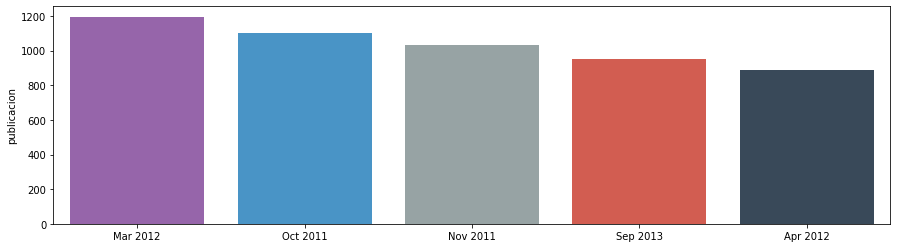

In [9]:
anio =  dataframe["publicacion"].value_counts().head(5)
f,ax = plt.subplots(1,1,figsize=(15,4))
ax = sns.barplot(anio.index, anio,palette=paleta)

In [10]:
print(anio)

Mar 2012    1196
Oct 2011    1100
Nov 2011    1034
Sep 2013     952
Apr 2012     890
Name: publicacion, dtype: int64


**Resultados:** El año y mes donde se han publicado una mayor cantidad de libros es Marzo de 2012 

### Mes y año con menor numero de publicaciones

Text(0, 0.5, 'Mes y año')

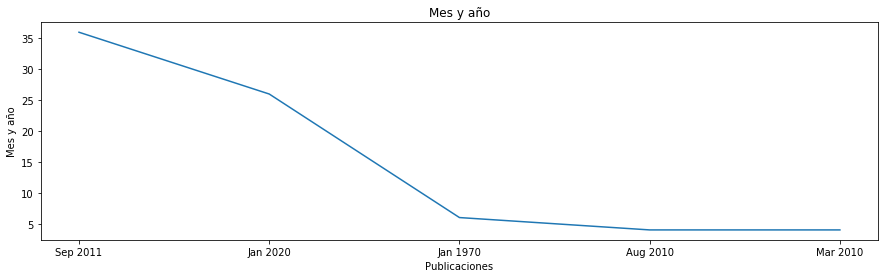

In [11]:
anio =  dataframe["publicacion"].value_counts().tail(5)
figura = plt.figure(figsize=(15,4))
ax = figura.add_subplot(1, 1, 1)
ax.plot(anio)
ax.set_title('Mes y año')
ax.set_xlabel('Publicaciones')
ax.set_ylabel('Mes y año')

**Resultados:** El año y mes donde se han publicado la menor cantidad de libros es Marzo de 2010

### Autores por Categoría

categoria
Autoayuda, Referencia                      2806
Religión, Espiritualidad                   2324
Ficción Contemporánea                      1468
Historia, Geografía, Ciencias Políticas    1400
Romance                                    1282
Name: autor, dtype: int64


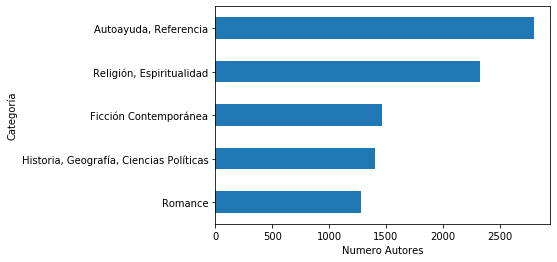

In [12]:
autores = dataframe.groupby("categoria")["autor"].size().sort_values(ascending=False).head(5)
print(autores)
ax = autores.plot(kind="barh")
plt.xlabel('Numero Autores'); 
plt.ylabel('Categoría'); 
ax.invert_yaxis()

**Resultado:** Autoayuda, Referencia es la categoría que cuenta con mayor variedad de autores

autor
Anónimo                  562
Varios Autores           274
Yolanda Pinto            238
Varios                   234
Humberto R. Méndez B.    112
Name: titulo, dtype: int64


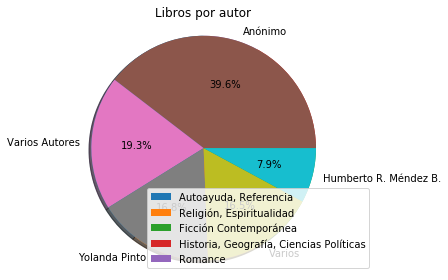

In [25]:
libros = dataframe.groupby("autor")["titulo"].size().sort_values(ascending=False).head(5)
print(libros )
patches,texts=plt.pie(libros,shadow=True,startangle=90)
plt.pie(libros,shadow=True,labels=libros.index,autopct='%1.1f%%')
plt.legend(patches,autores.index,loc="lower right")
plt.axis("equal")
plt.title("Libros por autor")
plt.tight_layout()
plt.show()